# Dealing with inbalanced Dataset



# Loading data

In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
# file_all_features = up.open("Data/all_feature.root")
# all_feature = file_all_features['all_feature'].arrays(library = 'np')

In [3]:
all_feature = pd.read_csv("/mnt/fcufino/all_features.csv")

## Checking the dataset size

(array([1000081., 1468385.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

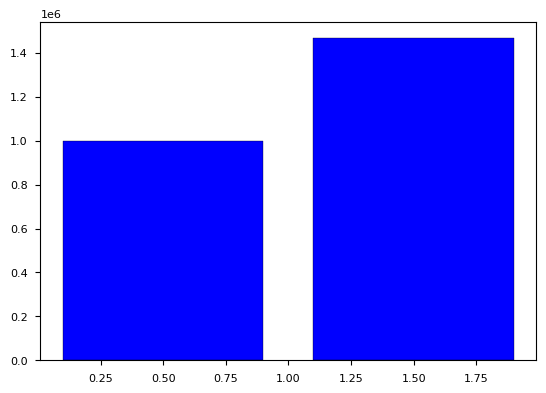

In [4]:
#plot a hist that counts the IBD and BKG
plt.hist(all_feature['Label'], bins = 2, range = (0,2), histtype = 'bar', rwidth = 0.8, color = 'b', label = 'BKG')




# Balancing the dataset

In [5]:
print("BKG: ", all_feature["delta_time"][all_feature['Label']==0].shape[0])
print("IBD: ", all_feature["delta_time"][all_feature['Label']==1].shape[0]) 

BKG:  1000081
IBD:  1468385


Sotto per mostrare che nel dataset BKG ci sono anche IBD non correlati

In [6]:
print(all_feature['Source'][all_feature["Label"]==0].unique())

[0. 1.]


In [7]:
for key in all_feature.keys():
    print(key)
print(all_feature.keys())

E_pro
delta_radius
Label
E_del
R_delayed
delta_time
R_prompt
Source
Index(['E_pro', 'delta_radius', 'Label', 'E_del', 'R_delayed', 'delta_time',
       'R_prompt', 'Source'],
      dtype='object')


In [8]:
# Elimina gli elementi desiderati dal dataset
num_IBD = all_feature["delta_time"][all_feature['Label']==1].shape[0]
num_BKG = all_feature["delta_time"][all_feature['Label']==0].shape[0]

del_BKG = 0
del_IBD = 0

if num_IBD > num_BKG:
    del_IBD = num_IBD - num_BKG
    to_del_ibd = all_feature.shape[0] - del_IBD
    order = np.argsort(all_feature["Label"])
    all_feature = all_feature.iloc[order].dropna()
    all_feature = all_feature.iloc[:to_del_ibd]

elif num_IBD < num_BKG:
    del_BKG = num_BKG - num_IBD
    order = np.argsort(all_feature["Label"])
    all_feature = all_feature.iloc[order].dropna()
    all_feature = all_feature.iloc[del_BKG:]

print("BKG:", all_feature["Label"][all_feature['Label']==0].shape[0]) 
print("IBD:",  all_feature["Label"][all_feature['Label']==1].shape[0])

BKG: 1000081
IBD: 1000081


# Plots

In [9]:
print(np.logical_and(all_feature["E_pro"] > 100 , True).sum())
print(np.logical_and(all_feature["E_del"] > 100 , True).sum())

64
68


In [10]:
all_feature.describe()

,E_pro,delta_radius,Label,E_del,R_delayed,delta_time,R_prompt,Source
count,2.000162e+06,2.000162e+06,2000162.0,2.000162e+06,2.000162e+06,2.000162e+06,2.000162e+06,2.000162e+06
mean,2.142118e+00,1.059980e+04,0.5,1.534151e+00,1.424177e+04,3.807990e+05,1.424987e+04,5.033117e-01
std,2.157978e+00,1.147984e+04,0.5,1.647265e+00,3.496881e+03,3.145566e+05,3.486147e+03,4.999892e-01
min,0.000000e+00,6.084932e-01,0.0,0.000000e+00,0.000000e+00,6.400000e+02,3.947012e-06,0.000000e+00
25%,5.691091e-01,3.316806e+02,0.0,5.678132e-01,1.220154e+04,1.106400e+05,1.220738e+04,0.000000e+00
50%,1.796610e+00,2.045694e+03,0.5,2.131900e+00,1.531965e+04,2.887090e+05,1.532872e+04,1.000000e+00
75%,3.291638e+00,2.113910e+04,1.0,2.219660e+00,1.739900e+04,6.109250e+05,1.739900e+04,1.000000e+00
max,3.913881e+02,3.479771e+04,1.0,3.913881e+02,1.740007e+04,1.099999e+06,1.740007e+04,1.000000e+00


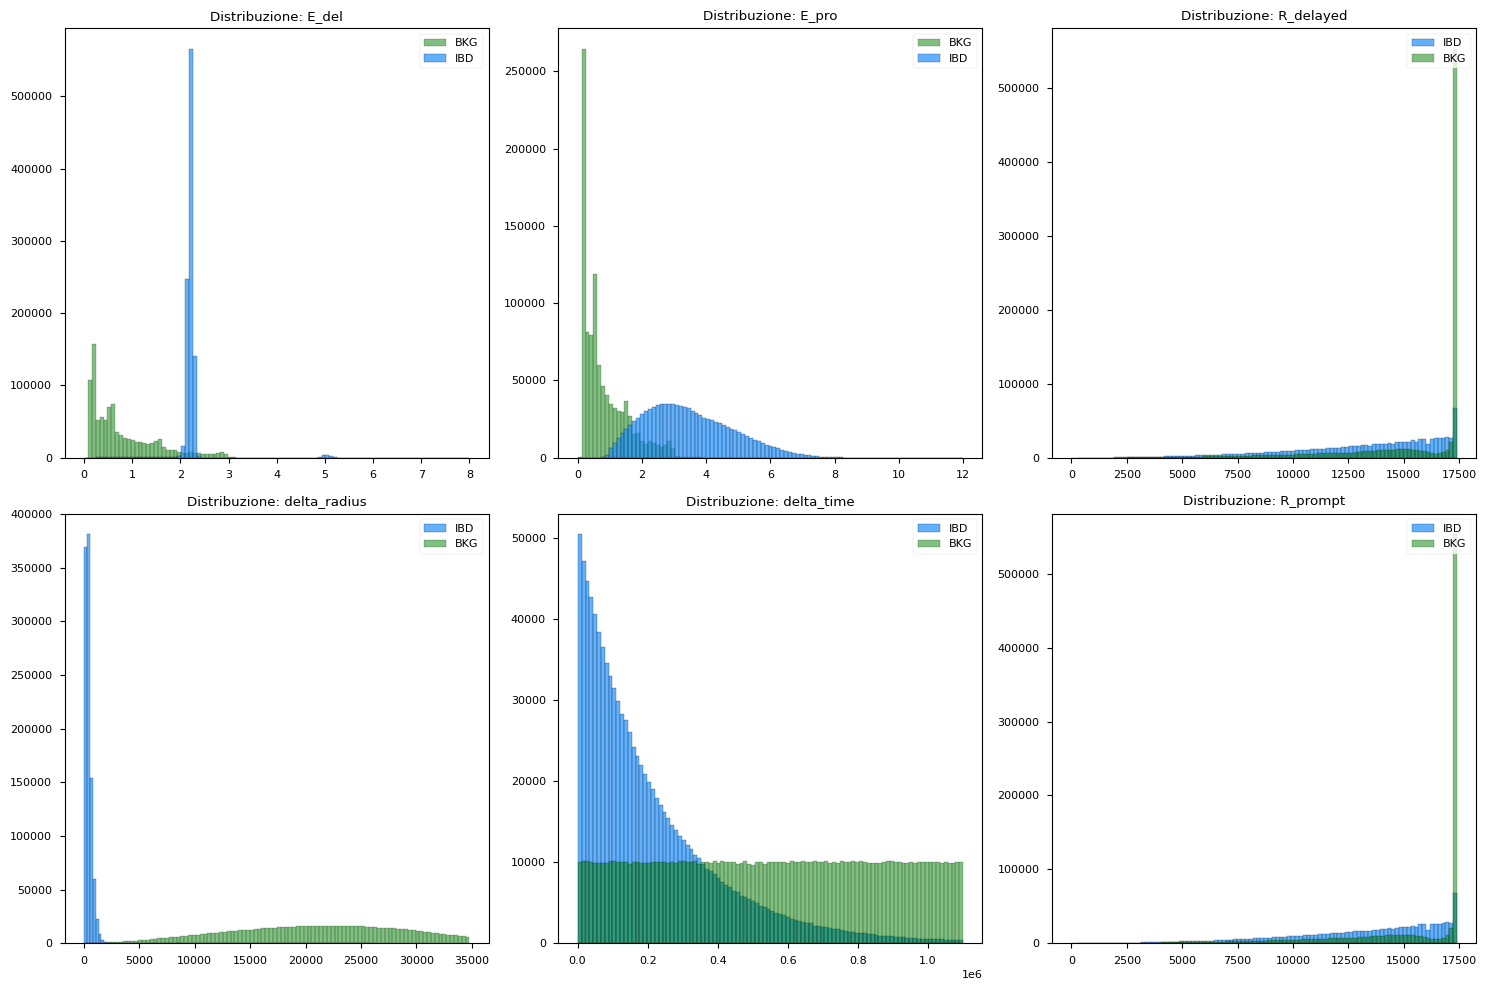

In [11]:
features = ['E_del',"E_pro","R_delayed","delta_radius","delta_time","R_prompt"]
# Definisci le dimensioni della griglia dei subplot
num_rows = 2  # Numero di righe
num_cols = 3  # Numero di colonne

# Crea una figura e una griglia di subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Itera attraverso tutte le features
for idx, feature in enumerate(features):
    # Calcola gli indici della riga e della colonna corrente
    row = idx // num_cols
    col = idx % num_cols

    # Seleziona l'asse corrispondente alla riga e alla colonna corrente
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    if feature == "E_del":
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,8,100), color='green',alpha = 0.5, label='BKG')
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,8,100), color='dodgerblue',alpha = 0.7, label='IBD')
    
    elif feature == "E_pro":
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,12,100), color='green',alpha = 0.5, label='BKG')
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,12,100), color='dodgerblue',alpha = 0.7, label='IBD')
    else:
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=100, color='dodgerblue',alpha = 0.7, label='IBD')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],bins=100, color='green',alpha = 0.5, label='BKG')
    

 
    ax.set_title(f'Distribuzione: {feature}')
    ax.legend(loc='upper right')
    

plt.tight_layout()
plt.show()

# ML Classification Algorithms

In [12]:
print(all_feature['delta_time'].shape)
print(all_feature['delta_time'].shape)
print(all_feature['E_del'].shape)
print(all_feature['E_pro'].shape)
print(all_feature['R_delayed'].shape)
print(all_feature['R_prompt'].shape)
print(all_feature['delta_radius'].shape)

(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)


## Creating train and test datasets

In [13]:
from sklearn.model_selection import train_test_split


columns_to_exclude = ['Label', 'Source']


X = all_feature.drop(columns_to_exclude, axis=1)
Y = all_feature['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.1)

## XGBClassifier

In [14]:
from sklearn.metrics import roc_auc_score
import time
import xgboost as xgb

In [15]:
from sklearn.metrics import accuracy_score
import os
import xgboost as xgb

scale_pos_weight = (len(all_feature['Label'])-all_feature['Label'].sum())/all_feature['Label'].sum()

model_path = "xgboost_new.model"

# Verifica se il file del modello esiste
if os.path.isfile(model_path):
    # Carica il modello da file
    model = xgb.sklearn.XGBClassifier()
    model.load_model(model_path)
    print("Model loaded")
else:
    # Crea e addestra il modello se il file non esiste
    model = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=10000, max_depth=6, learning_rate = 0.05) #, scale_pos_weight = scale_pos_weight)

    eval_set = [(X_train, y_train), (X_validation, y_validation)]
    model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False, early_stopping_rounds=10)
    print("Finished training")

    # Salva il modello in file
    model.save_model(model_path)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Calcola l'accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)


/home/fcufino/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/fcufino/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Finished training
Accuracy: 99.99%


In [16]:
accuracy

0.9999350053620576

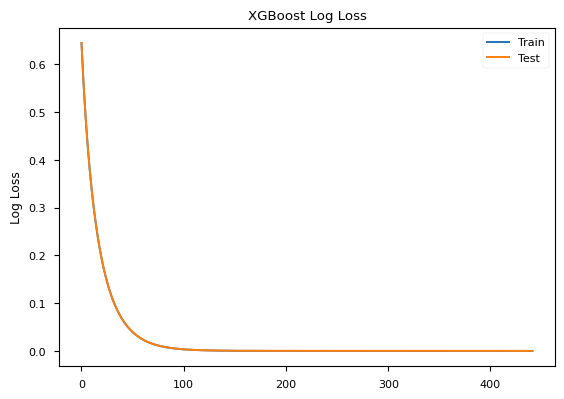

In [17]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')

ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')

plt.show()


In [18]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))
sklearn.metrics.confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199856
         1.0       1.00      1.00      1.00    200177

    accuracy                           1.00    400033
   macro avg       1.00      1.00      1.00    400033
weighted avg       1.00      1.00      1.00    400033



array([[199839,     17],
       [     9, 200168]])

In [19]:
features_names = [key for key in all_feature.keys() if key!= "Label"]
print(features_names)

['E_pro', 'delta_radius', 'E_del', 'R_delayed', 'delta_time', 'R_prompt', 'Source']


### Shap Interpretability

/home/fcufino/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/fcufino/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

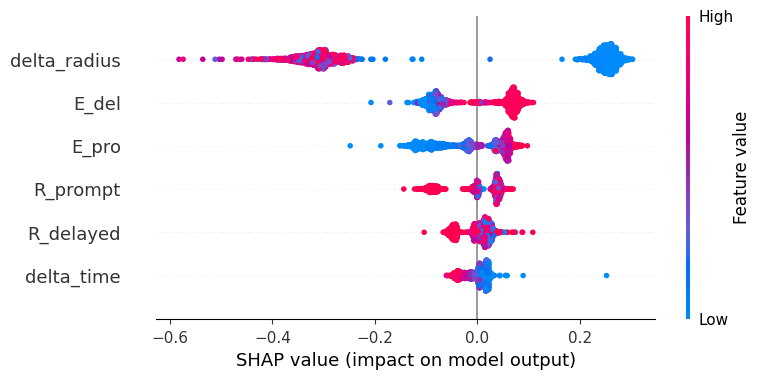

In [20]:
import shap
features_names = X.columns

#Creo un oggetto explainer SHAP
explainer = shap.Explainer(model, X_test[:2000],model_output="probability")

# Calcolo i valori di Shapley per il set di test
shap_values = explainer(X_test[:2000])
 
# Plotto il summary plot di SHAP
shap.summary_plot(shap_values, X_test[:2000], feature_names=features_names);

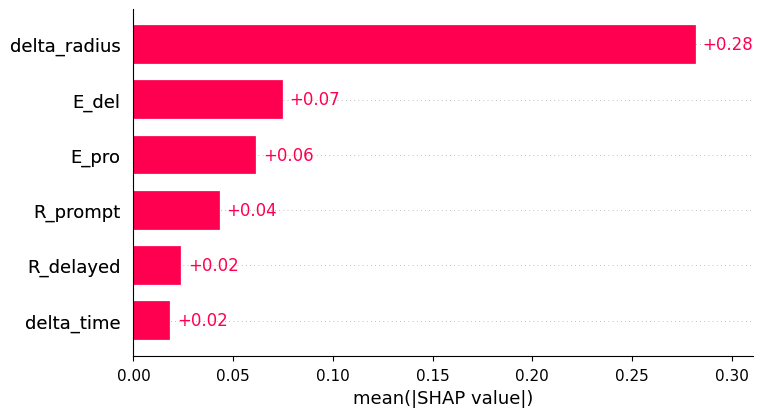

In [21]:
# Importnce plot
shap.plots.bar(shap_values)

In [22]:
shap.initjs()

shap.plots.force(shap_values)

In [23]:
shap_values[:, "delta_radius"]

.values =
array([ 0.24080154,  0.24383808,  0.25622168, ..., -0.33588183,
        0.27028991, -0.30559537])

.base_values =
array([0.54999764, 0.54999764, 0.54999764, ..., 0.54999764, 0.54999764,
       0.54999764])

.data =
array([  288.58262959,   191.21749763,    68.00386533, ...,
       17454.04492188,   187.29332529,  8519.30371094])

In [24]:
shap_values[10, "delta_radius"].values

-0.2750617030479193

In [25]:
for i in range(len(shap_values[:, "delta_radius"].values)):
    if abs(shap_values[i, "delta_radius"].values) < 0.15 :
        print(abs(shap_values[i, "delta_radius"].values))
        print(i)
        # print(shap_values[i])

0.024623196840233993
123
0.12586178929537614
431
0.10871575277699368
1368
0.127380113381546
1946


In [26]:

expected_value = explainer.expected_value

predicted_probability = np.zeros(len(shap_values.values))
for i in range(len(shap_values.values)):
    predicted_probability[i] = expected_value + shap_values.values[i].sum()


IBD, 0.9980114810926627
(2000,)


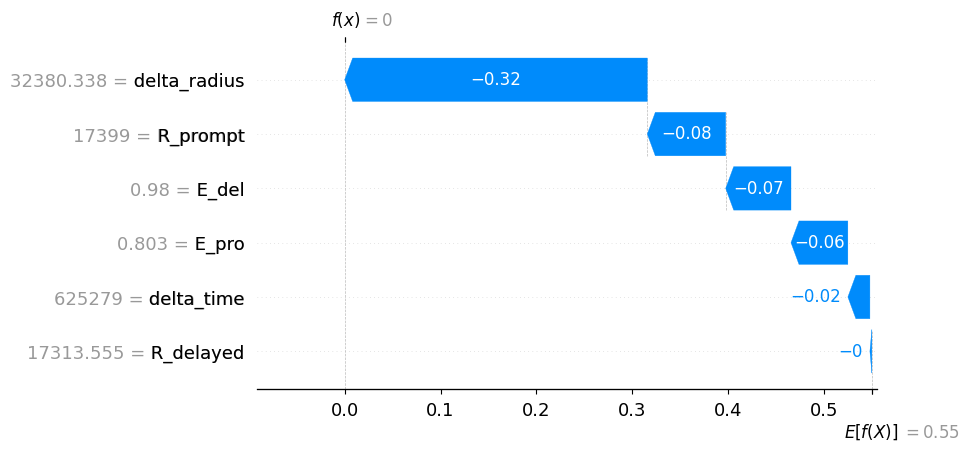

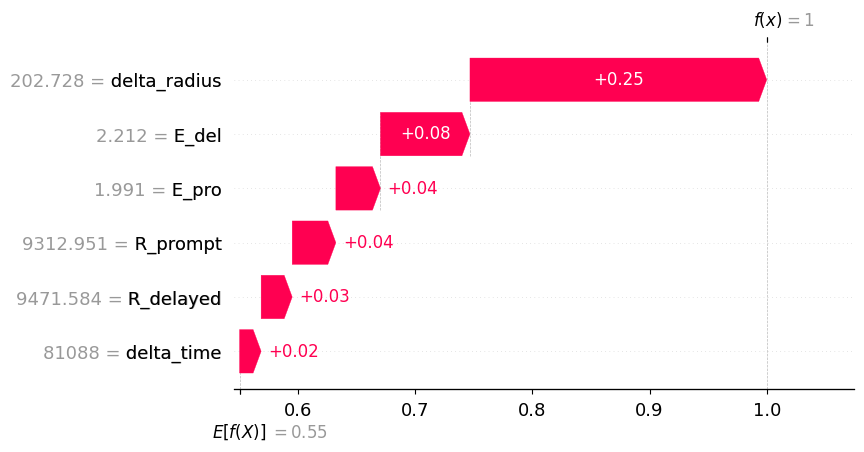

In [27]:
for i in predicted_probability:	
    # print(i)
    if i > 0.41 and i < 0.9991:
        print("IBD,",i)
    elif i > 0.05 and i < 0.15:
        print("BKG,", i)

#Li ordino dato che sono tutti o 0 oppure tutti 1, in totale ci sono 2000 elementi
np.argsort(predicted_probability)
print(predicted_probability.shape)

shap.plots.waterfall(shap_values[107])
shap.plots.waterfall(shap_values[1543])

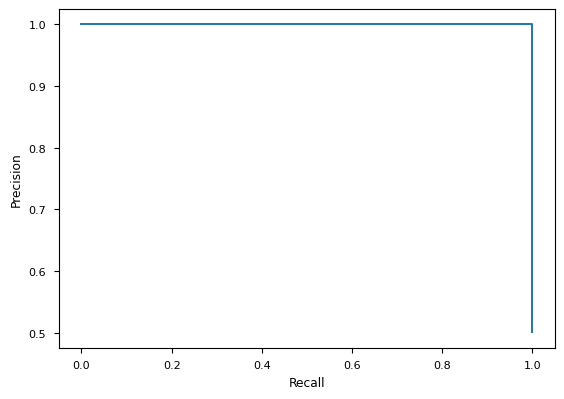

In [28]:
#plot the precision-recall curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)

precision, recall, _ = precision_recall_curve(y_test, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()


### Optimizing XGBoost

In [29]:
from sklearn.model_selection import GridSearchCV 

#Create values to search over
cv_params = {'max_depth': [2, 3, 4, 6, 7, 8]}, #Maximum depth of a tree, increasing increase complxity


ind_params = {'n_estimators': 30000, 'learning_rate': 0.05}
fit_params = {'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'eval_set':eval_set, 'verbose':0}
opt_XGBclassifier = GridSearchCV(
    xgb.XGBClassifier(**ind_params), 
    cv_params, 
    scoring = 'accuracy',
    cv = 10,
    n_jobs = -1,
    verbose=0
)


opt_XGBclassifier.fit(X_train, y_train, **fit_params)
opt_XGBclassifier.cv_results_

/home/fcufino/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/fcufino/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/fcufino/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/fcufino/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`se

{'mean_fit_time': array([ 822.21938672,  836.54762545,  961.3787869 , 1060.04302299,
        1134.90250316, 1093.98071804]),
 'std_fit_time': array([182.14259414, 120.29680972, 126.11759879, 217.28271083,
        153.82127457, 119.80978702]),
 'mean_score_time': array([0.58241498, 0.68765318, 0.82201276, 1.10103745, 1.1025836 ,
        1.03022544]),
 'std_score_time': array([0.10785856, 0.08031724, 0.08964362, 0.21374856, 0.19978741,
        0.14767067]),
 'param_max_depth': masked_array(data=[2, 3, 4, 6, 7, 8],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8}],
 'split0_test_score': array([0.99995139, 0.99995139, 0.99995139, 0.99995139, 0.99993751,
        0.99993751]),
 'split1_test_score': array([0.99997222, 0.99997917, 0.99997917, 0.99995834, 0.99996528,
        0.99995834]),
 'split2_test_

In [30]:
#Print scores
print('The optimal score on training set is {:0.3f}'.format(opt_XGBclassifier.best_score_))

#Find optimal parameters

print('The optimal parameters for the classifier are:')
print(opt_XGBclassifier.best_params_)

#Fit performance on the test set
XGBclassifier_final=opt_XGBclassifier.best_estimator_
y_pred_final=XGBclassifier_final.predict(X_test)
print("Model Accuray with optimal parameters: {:.2f}%".format(100*XGBclassifier_final.score(X_test, y_test)))
print("The  AUC score is {:.2f}".format(roc_auc_score(y_test,y_pred_final)))

The optimal score on training set is 1.000
The optimal parameters for the classifier are:
{'max_depth': 2}
Model Accuray with optimal parameters: 99.99%
The  AUC score is 1.00


### Selezione BDT sul dataset di sola radioattività

In [31]:
all_feature_r = pd.read_csv("/mnt/fcufino/all_features.csv")

In [32]:
X_rad_df = all_feature_r[(all_feature_r["Label"] == 0) & (all_feature_r["Source"] == 0)]
X_rad = X_rad_df.drop(['Label', 'Source'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_rad_pred = model.predict(X_rad)

In [33]:
print(y_rad_pred.sum(), "su", y_rad_pred.shape[0])

TP = np.logical_and(X_rad_df['Label'] == 0, y_rad_pred == 0)
TN = np.logical_and(X_rad_df['Label'] == 1, y_rad_pred == 1)
FN = np.logical_and(X_rad_df["Label"] == 0, y_rad_pred == 1)
FP = np.logical_and(X_rad_df["Label"] == 1, y_rad_pred == 0) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

10 su 993457
Efficiency:  99.9989934139072
Purity:  100.0


### Selezione BDT sul dataset di soli veri IBD

In [34]:
X_true_IBD_df = all_feature_r[(all_feature_r["Label"] == 1) & (all_feature_r["Source"] == 1)]
X_true_IBD = X_true_IBD_df.drop(['Label', 'Source'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_true_IBD_pred = model.predict(X_true_IBD)


In [35]:
print("Venongono selezionati come IBD ", y_true_IBD_pred.sum(),"Su un tot di", y_true_IBD_pred.shape[0])


TP = np.logical_and(X_true_IBD_df['Label'] == 1, y_true_IBD_pred == 1)
TN = np.logical_and(X_true_IBD_df['Label'] == 0, y_true_IBD_pred == 0)
FN = np.logical_and(X_true_IBD_df["Label"] == 1, y_true_IBD_pred == 0)
FP = np.logical_and(X_true_IBD_df["Label"] == 0, y_true_IBD_pred == 1) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

Venongono selezionati come IBD  1468351 Su un tot di 1468385
Efficiency:  99.99768453096429
Purity:  100.0


# R vs $\Delta R$

Text(0, 0.5, '$\\Delta$t [ns]')

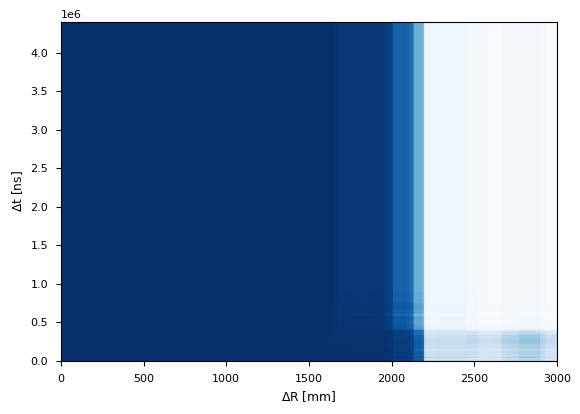

In [36]:
to_plot = pd.DataFrame()

dr_array = np.linspace(0, 3000, 1000)
dt_array = np.linspace(0, 20*220e3, 1000)

dr_mesh, dt_mesh = np.meshgrid(dr_array, dt_array)

elements = len(dr_mesh.flatten())
R = 17600
to_plot['R_prompt'] = R*np.ones(elements)
to_plot['R_delayed'] = R*np.ones(elements)
to_plot['E_pro'] = 1.*np.ones(elements)
to_plot['delta_radius'] = dr_mesh.flatten()
to_plot['E_del'] = 2.2*np.ones(elements)
to_plot['delta_time'] = dt_mesh.flatten()
to_plot = to_plot[X.columns]

probs = model.predict_proba(to_plot)[:, 1].reshape(dr_mesh.shape)

plt.imshow(probs, cmap = 'Blues', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), dt_mesh.min(), dt_mesh.max()), aspect = 'auto')

plt.xlabel(r'$\Delta$R [mm]')
plt.ylabel(r'$\Delta$t [ns]')

The following kwargs were not used by contour: 'aspect'


Text(0, 0.5, 'R [mm]')

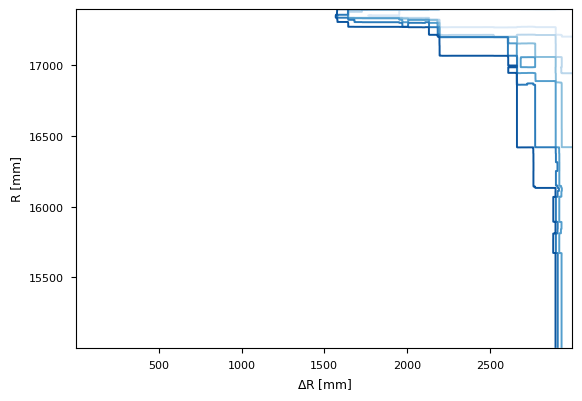

In [37]:
to_plot = pd.DataFrame()

dr_array = np.linspace(0, 3000, 1000)
R_array = np.linspace(15000, 17400, 1000)

dr_mesh, R_mesh = np.meshgrid(dr_array, R_array)

elements = len(dr_mesh.flatten())
to_plot['R_prompt'] = R_mesh.flatten()
to_plot['R_delayed'] = to_plot['R_prompt']
to_plot['E_pro'] = 1.*np.ones(elements)
to_plot['delta_radius'] = dr_mesh.flatten()
to_plot['E_del'] = 2.2*np.ones(elements)
to_plot['delta_time'] = 220e3
to_plot = to_plot[X.columns]

probs = model.predict_proba(to_plot)[:, 1].reshape(dr_mesh.shape)

plt.contour(probs, cmap = 'Blues', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), R_mesh.min(), R_mesh.max()), aspect = 'auto')

plt.xlabel(r'$\Delta$R [mm]')
plt.ylabel(r'R [mm]')